# Decision Tree Classifier
# Decision Tree Classifier on Iris Dataset

**Objective**

The objective of this notebook is to introduce the concept and implementation of a Decision Tree Classifier. We will use feature 3 (Petal length) and feature 4 (Petal width) from the Iris dataset to classify the flowers into one of the three species: Setosa, Versicolor, or Virginica.

In [1]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Load the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Extract the third and fourth features along with the target variable
X = df.iloc[:, [2, 3]].values
y = df['target'].values

In [3]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Initialize and train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [5]:
# Evaluate the model's performance
score = clf.score(X_test, y_test)
print(f"Model Accuracy: {score:.2f}")

Model Accuracy: 1.00


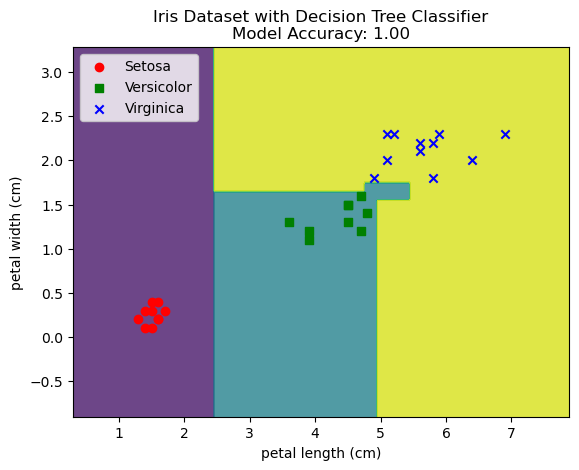

In [6]:
# Create meshgrid for plotting
h = .02
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions on meshgrid points
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot the test points
markers = ['o', 's', 'x']
colors = ['r', 'g', 'b']
labels = ['Setosa', 'Versicolor', 'Virginica']
for i in np.unique(y_test):
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], c=colors[i], marker=markers[i], label=labels[i])

plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
plt.legend(loc='upper left')
plt.title(f'Iris Dataset with Decision Tree Classifier\nModel Accuracy: {score:.2f}')
plt.show()


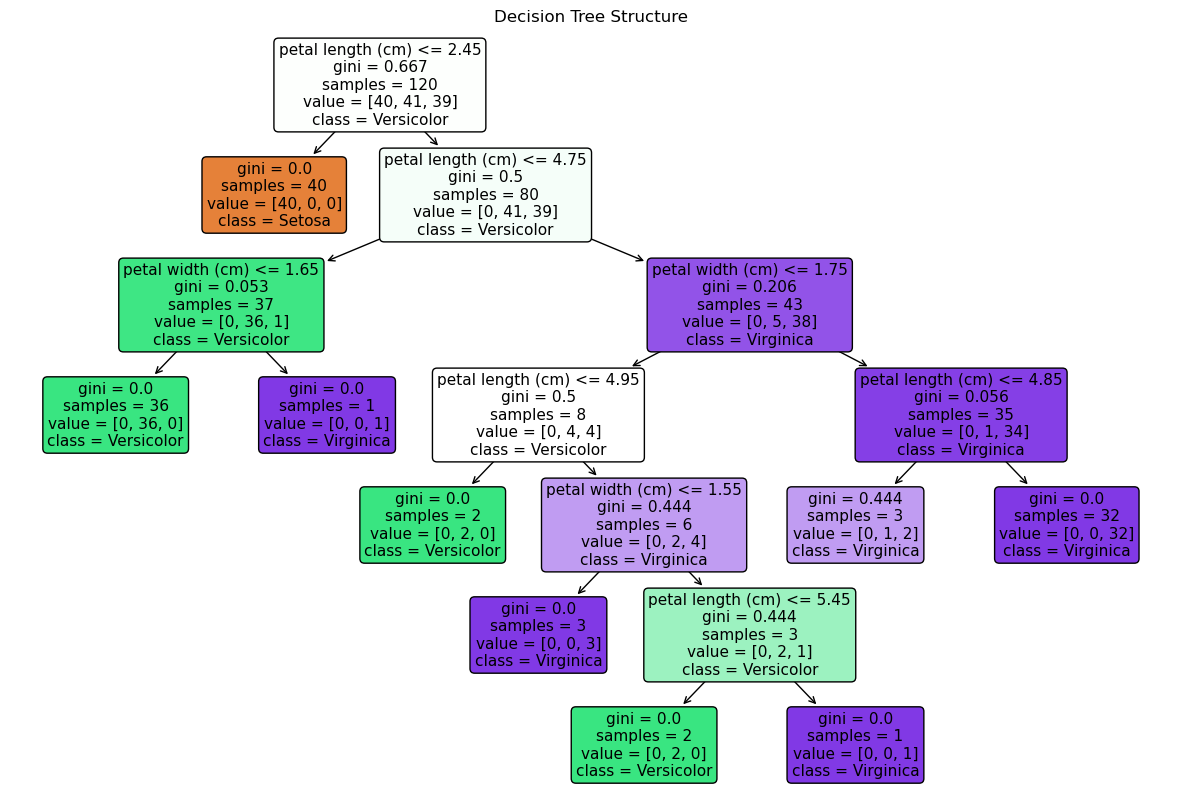

In [7]:
from sklearn.tree import plot_tree

# Plot the actual Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=data.feature_names[2:], class_names=labels, rounded=True)
plt.title('Decision Tree Structure')
plt.show()

## Conclusion

In this notebook, we introduced the concept of Decision Tree Classifiers and demonstrated its implementation using features 3 and 4 of the Iris dataset. The classifier achieved an accuracy of 100%, which might raise concerns about overfitting.
